<a href="https://colab.research.google.com/github/AlaaIraqy/machine_learning_problems/blob/main/sheet4_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

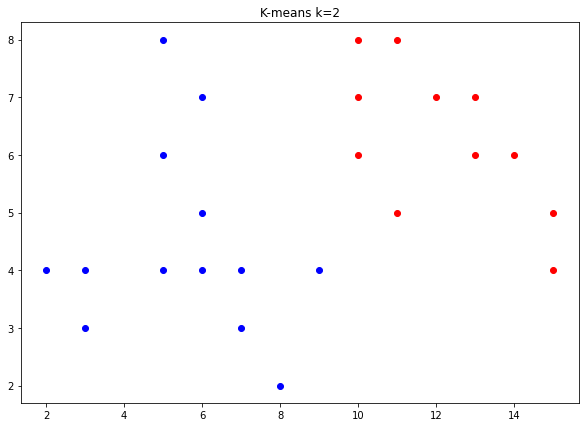

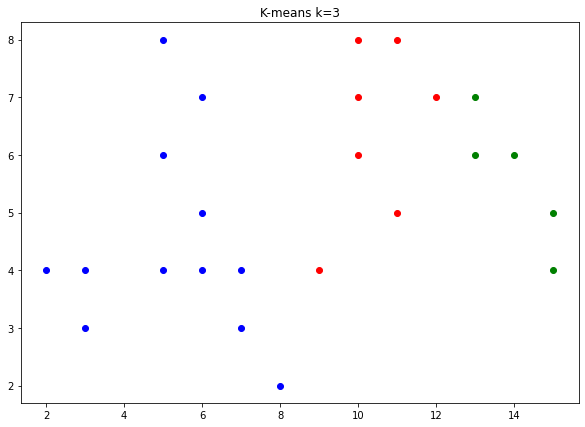

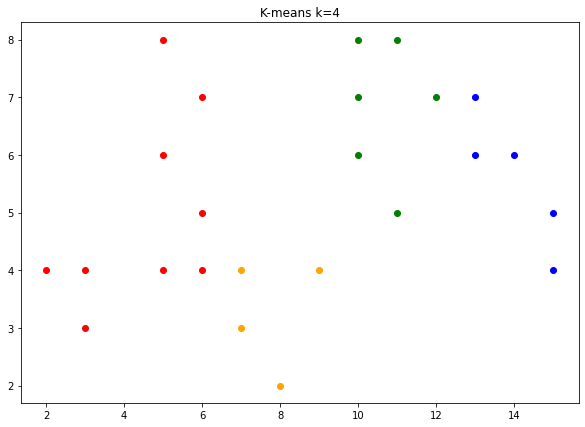

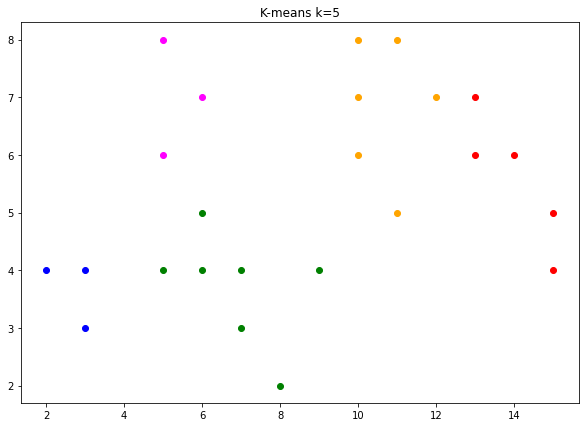

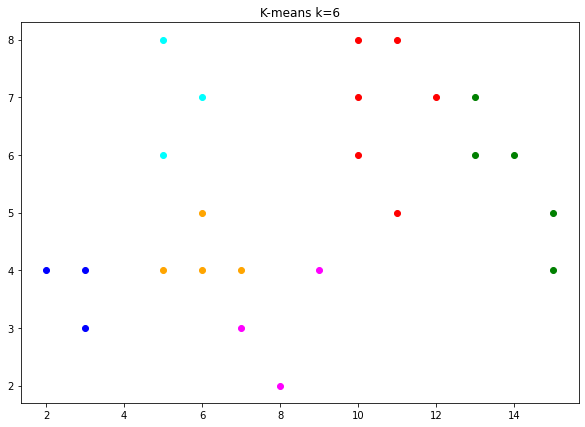

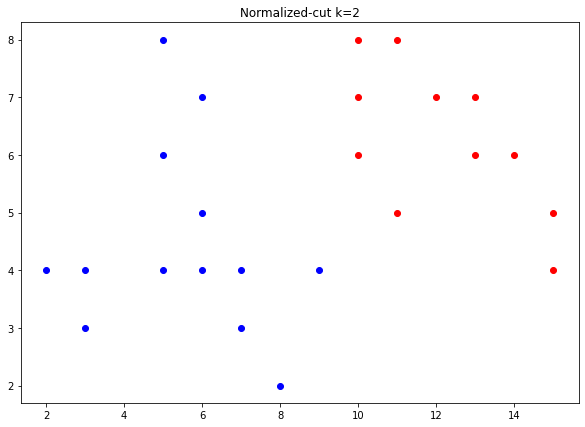

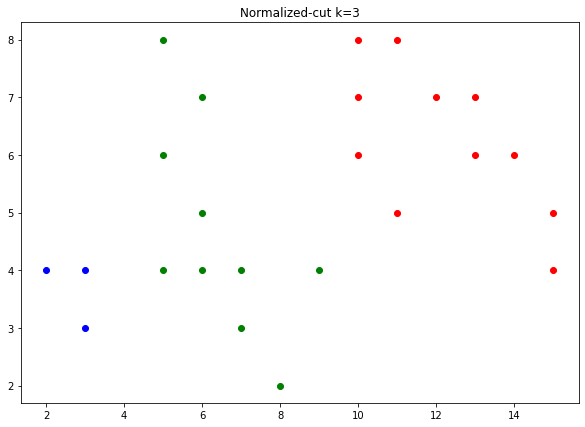

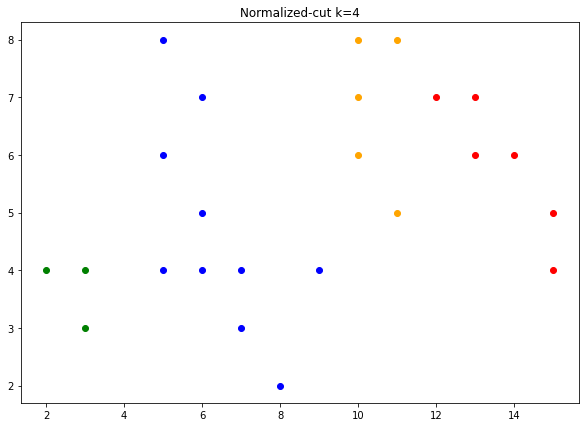

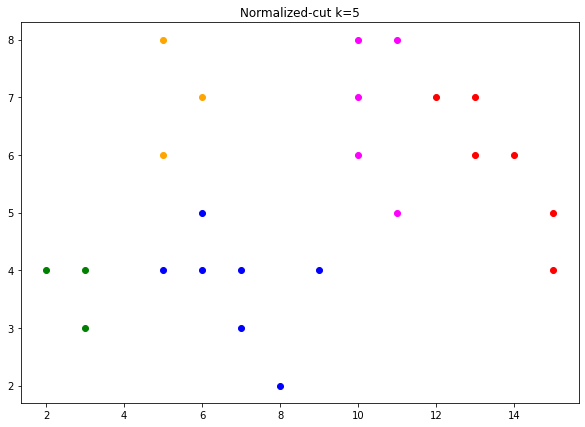

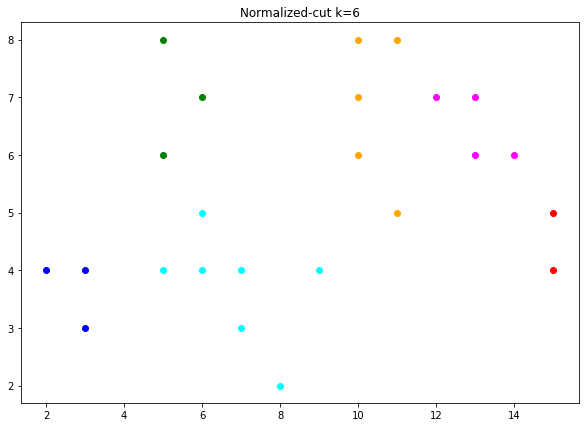

purity for kmeans with k=3
1.0
0.0
0.5454545454545454
purity for Ncut with k=3
1.0
1.0
1.0
max matching for kmeans with k=3
[[6 0 5]
 [0 3 0]
 [1 9 0]]
0.375
max matching for Ncut with k=3
[[11  0  0]
 [ 0  3  0]
 [ 0  0 10]]
1.0
F-measure for Ncut with k=3
1.0
cluster entropy: 
1.0327438135557083
joint entropy: 
 0.9822815054843264
Proximity matrix: 
 [[323.8909647  329.80576007 713.74896539]
 [329.80576007   6.82842712 129.66548426]
 [713.74896539 129.66548426 260.01406633]]
BetaCV: 
 0.4228544609188213
Normalized cut measure: 
 2.5128557971602854


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.cluster import contingency_matrix
import math
from scipy.spatial import distance_matrix

data=np.array([[5,8],[10,8],[11,8],[6,7],[10,7],[12,7],[13,7],[5,6],
                   [10,6],[13,6],[6,5],[9,4],[11,5],[14,6],[15,5],[2,4],
                   [3,4],[5,4],[6,4],[7,4],[15,4],[3,3],[7,3],[8,2]])

T1=np.array([[2,4],[3,4],[3,3]])
T2=np.array([[5,8],[6,7],[5,6],[6,5],[5,4],[6,4],[7,4],[9,4],[7,3],[8,2]])
T3=np.array([[10,8],[11,8],[10,7],[10,6],[11,5],[12,7],[13,7],[13,6],[14,6],[15,5],[15,4]])
T1_index = np.array([16,17,22])
T2_index = np.array([1,4,8,11,18,19,20,12,23,24])
T3_index = np.array([2,3,5,9,13,6,7,10,14,15,21])

groundTruthLabels = np.array([2,0,0,2,0,0,0,2,0,0,2,2,0,0,0,1,1,2,2,2,0,1,2,2])

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(data)
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(data)
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(data)
kmeans6 = KMeans(n_clusters=6, random_state=0).fit(data)

clustering2 = SpectralClustering(n_clusters=2,assign_labels='discretize', random_state=0).fit(data)
clustering3 = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state=0).fit(data)
clustering4 = SpectralClustering(n_clusters=4,assign_labels='discretize', random_state=0).fit(data)
clustering5 = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=0).fit(data)
clustering6 = SpectralClustering(n_clusters=6, assign_labels='discretize', random_state=0).fit(data)


colors = ['red', 'blue', 'green','orange', 'magenta', 'cyan']
labels = kmeans2.labels_
fig = plt.figure(figsize = (10, 7))
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("K-means k=2")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = kmeans3.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("K-means k=3")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = kmeans4.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("K-means k=4")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = kmeans5.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("K-means k=5")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = kmeans6.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("K-means k=6")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = clustering2.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("Normalized-cut k=2")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = clustering3.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("Normalized-cut k=3")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = clustering4.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("Normalized-cut k=4")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = clustering5.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("Normalized-cut k=5")
plt.show();

fig = plt.figure(figsize = (10, 7))
labels = clustering6.labels_
for i in range(24):
  plt.scatter(data[i][0], data[i][1], c = colors[labels[i]])
plt.title("Normalized-cut k=6")
plt.show();

# purity for kmeans with k=3
print("purity for kmeans with k=3")
score1=0
for i in T1_index:
  if(kmeans3.labels_[i-1]==1):
    score1+=1
kmeans3_cluster1_purity =float( score1 / len(T1_index) )
print(kmeans3_cluster1_purity)
score2=0
for i in T2_index:
  if(kmeans3.labels_[i-1]==2):
    score2+=1
kmeans3_cluster2_purity =float( score2 / len(T2_index) )
print(kmeans3_cluster2_purity)
score3=0
for i in T3_index:
  if(kmeans3.labels_[i-1]==0):
    score3+=1
kmeans3_cluster3_purity =float( score3 / len(T3_index) )
print(kmeans3_cluster3_purity)

# purity for Ncut with k=3
print("purity for Ncut with k=3")
score11=0
for i in T1_index:
  if(clustering3.labels_[i-1]==1):
    score11+=1
Ncut3_cluster1_purity =float( score11 / len(T1_index) )
print(Ncut3_cluster1_purity)
score22=0
for i in T2_index:
  if(clustering3.labels_[i-1]==2):
    score22+=1
Ncut3_cluster2_purity =float( score22 / len(T2_index) )
print(Ncut3_cluster2_purity)
score33=0
for i in T3_index:
  if(clustering3.labels_[i-1]==0):
    score33+=1
Ncut3_cluster3_purity =float( score33 / len(T3_index) )
print(Ncut3_cluster3_purity)

# max matching for kmeans with k=3
print("max matching for kmeans with k=3")
Cmatrix = contingency_matrix(groundTruthLabels,kmeans3.labels_)
print(Cmatrix)
maxMatch =float( (Cmatrix[0][0] + Cmatrix [1][1] + Cmatrix [2][2]) / 24 )
print(maxMatch)

# max matching for Ncut with k=3
print("max matching for Ncut with k=3")
Cmatrix2 = contingency_matrix(groundTruthLabels,clustering3.labels_)
print(Cmatrix2)
maxMatch2 =float( (Cmatrix2[0][0] + Cmatrix2 [1][1] + Cmatrix2 [2][2]) / 24 )
print(maxMatch2)

# F-measure for Ncut with k=3
print("F-measure for Ncut with k=3")
kmeans_percision1 = Ncut3_cluster1_purity
kmeans_recall1 = float (score11/list(clustering3.labels_).count(1))
Fmeasure1 =float (2*kmeans_percision1*kmeans_recall1)/(kmeans_percision1+kmeans_recall1)
kmeans_percision2 = Ncut3_cluster2_purity
kmeans_recall2 = float (score22/list(clustering3.labels_).count(2))
Fmeasure2 =float (2*kmeans_percision2*kmeans_recall2)/(kmeans_percision2+kmeans_recall2)
kmeans_percision3 = Ncut3_cluster3_purity
kmeans_recall3 = float (score33/list(clustering3.labels_).count(0))
Fmeasure3 =float (2*kmeans_percision3*kmeans_recall3)/(kmeans_percision3+kmeans_recall3)
F_measure = 1/3 * (Fmeasure1+Fmeasure2+Fmeasure3)
print(F_measure)

# Conditional entropy for kmeans with k=3
print("cluster entropy: ")
Hc = -(list(kmeans3.labels_).count(1)/24)*math.log(list(kmeans3.labels_).count(1)/24)-(list(kmeans3.labels_).count(2)/24)*math.log(list(kmeans3.labels_).count(2)/24)-(list(kmeans3.labels_).count(0)/24)*math.log(list(kmeans3.labels_).count(0)/24)
print(Hc)
Ht = -(len(T1_index)/24)*math.log(len(T1_index)/24)-(len(T2_index)/24)*math.log(len(T2_index)/24)-(len(T3_index)/24)*math.log(len(T3_index)/24)
print("joint entropy: \n",Ht)

# internal measures 
def dist(x, y):
  return math.sqrt(pow(x[0] - y[0], 2) + pow(x[1] - y[1], 2))
def proximity_matrix(X, labels, n_clusters):
  n = len(X)
  d = np.zeros((n,n))
  C = np.zeros((n_clusters, n_clusters))
  for i in range(n):
    for j in range(n):
      d[i][j] = dist(X[i],X[j])
  for i in range(n_clusters):
    for j in range(n_clusters):
      for k in range(n):
        for x in range(n):
          if labels[k] == i and labels[x] == j:
            C[i][j] += d[k][x]
  return C
def comb(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
proxMatrix = proximity_matrix(data,groundTruthLabels,3)
print("Proximity matrix: \n",proxMatrix)
Nin = comb(len(T1_index),2)+comb(len(T2_index),2)+comb(len(T3_index),2)
Nout = len(T1_index)*len(T2_index)+len(T1_index)*len(T3_index)+len(T2_index)*len(T3_index)
Win = (proxMatrix[0][0]+proxMatrix[1][1]+proxMatrix[2][2])/2.0
Wout = proxMatrix[0][1]+proxMatrix[0][2]+proxMatrix[1][2]
BetaCV = (Nout * Win) / (Nin * Wout)
print("BetaCV: \n",BetaCV)

Nc1 = 1/(1+(proxMatrix[0][0]/(proxMatrix[0][1]+proxMatrix[0][2])))
Nc2 = 1/(1+(proxMatrix[1][1]/(proxMatrix[1][0]+proxMatrix[1][2])))
Nc3 = 1/(1+(proxMatrix[2][2]/(proxMatrix[2][1]+proxMatrix[2][0])))
Ncut = Nc1+Nc2+Nc3
print("Normalized cut measure: \n",Ncut)
